# COSC 311: Introduction to Data Visualization and Interpretation

Instructor: Dr. Shuangquan (Peter) Wang

Email: spwang@salisbury.edu

Department of Computer Science, Salisbury University


# Module 3_Data Plotting and Visualization

## 1. Visual principles & plotting



**Contents of this note refer to 1) Dr. Joe Anderson's teaching materials; 2) textbook "Data Science from Scratch"; 3) https://www.w3schools.com/python/numpy/default.asp**

**<font color=red>All rights reserved. Dissemination or sale of any part of this note is NOT permitted.</font>**

## Visual principles

Please refer to the PDF file (COSC311_Module3_1_Visual Principles.pdf)

## matplotlib and Graph types


matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. 

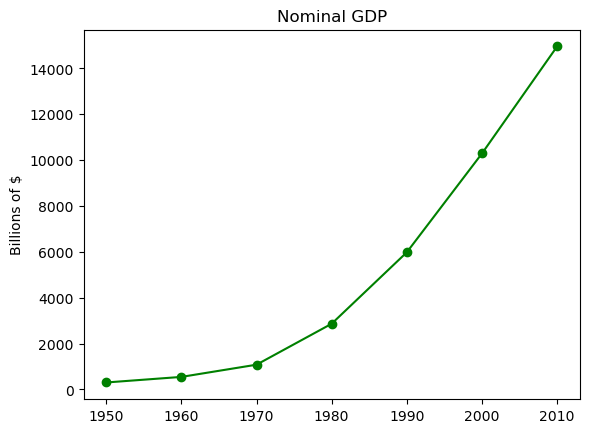

In [1]:
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# create a line chart, years on x-axis, gdp on y-axis
# https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# add a title
# matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)
plt.title("Nominal GDP")

# add a label to the y-axis
plt.ylabel("Billions of $")

# matplotlib.pyplot.show(*, block=None)
# Display all open figures.
plt.show()

# if you want to save this figure as a file, comment out line plt.show() and uncomment the following line 
# plt.savefig('viz_gdp.png')


## Bar charts

A good choice when you want to show how some quantity varies among some discrete set of items.

The following example shows how many Academy Awards were won by each of a variety of movies:

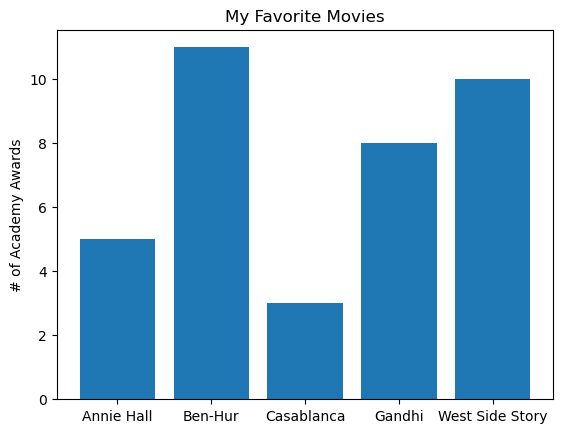

In [3]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# plot bars with x-coordinates [0, 1, 2, 3, 4], heights [num_oscars]
plt.bar(range(len(movies)), num_oscars)

plt.title("My Favorite Movies")     # add a title
plt.ylabel("# of Academy Awards")   # label the y-axis

# label x-axis with movie names at bar centers
plt.xticks(range(len(movies)), movies)

plt.show()


Before introducing the next example, let's look at the Counter class in collections module.

### Counter class in collections module

A Counter is a dict subclass for counting hashable objects. It is a collection where elements are stored as dictionary keys and their counts are stored as dictionary values. Counts are allowed to be any integer value including zero or negative counts. The Counter class is similar to bags or multisets in other languages.

In [4]:
from collections import Counter

In [5]:
xs = [1,2,3,4,3,2,3,1,2,1,1,2,3,2]

In [6]:
counts = Counter(xs)

In [7]:
counts

Counter({1: 4, 2: 5, 3: 4, 4: 1})

In [8]:
counts.keys()

dict_keys([1, 2, 3, 4])

In [9]:
counts.values()

dict_values([4, 5, 4, 1])

In [10]:
max(counts.values())

5

In [11]:
counts.items()

dict_items([(1, 4), (2, 5), (3, 4), (4, 1)])

In [12]:
[x[0] for x in counts.items() if x[1] == max(counts.values())]

[2]

In [13]:
x = []
for val, count in counts.items():
    if count == max(counts.values()):
#         x += [val]
        x.append(val)
x

[2]

In [ ]:
sorted([1,2,3,4,3,2,3,1,2,1,1,2,3,2])

In [ ]:
len([1,2,3,4,3,2,3,1,2,1,1,2,3,2])

### Another example for bar chart
Bar chart can also be a good choice for plotting histograms of bucketed numeric values to show how the values are distributed.

Counter({80: 4, 90: 3, 70: 3, 0: 2, 60: 1})


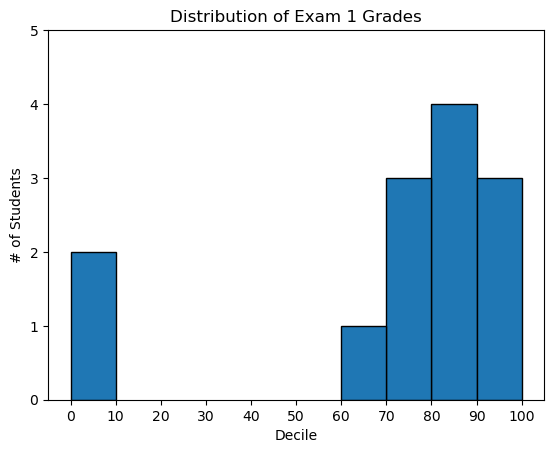

In [15]:
# The collection Module in Python provides different types of containers. 
# A Container is an object that is used to store different objects and provide a way to 
# access the contained objects and iterate over them. Some of the built-in containers are 
# Tuple, List, Dictionary, etc. 
# https://www.geeksforgeeks.org/python-collections-module/

from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

# Bucket grades by decile, but put 100 in with the 90s
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)
print(histogram)

plt.bar([x + 5 for x in histogram.keys()],  # Shift bars right by 5
        histogram.values(),                 # Give each bar its correct height
        10,                                 # Give each bar a width of 10
        edgecolor=(0, 0, 0))                # Black edges for each bar

plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                           # y-axis from 0 to 5

plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()



## Line chart

Line chart is a good choice to show the trends

In [ ]:
variance     = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]

# https://www.geeksforgeeks.org/zip-in-python/
total_error  = [x + y for x, y in zip(variance, bias_squared)]
# https://www.geeksforgeeks.org/enumerate-in-python/
xs = [i for i, _ in enumerate(variance)]

# We can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

# Because we've assigned labels to each series,
# we can get a legend for free (loc=9 means "top center")
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.show()


## Scatterplots

A scatterplot is a good choice to show the relationship between two paired sets of data.

The following figure shows the relationship between the number of friends your users have and the number of minutes they spend on the site every day:

In [ ]:
friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
        xy=(friend_count, minute_count), # Put the label with its point
        xytext=(5, -5),                  # but slightly offset
        textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()


## Data plotting example: adult dataset

The adult dataset: https://archive.ics.uci.edu/ml/datasets/adult

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

In [ ]:
adults = pd.read_csv('adult.data', header=None, skipinitialspace=True,
    names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
            'marital-status', 'occupation', 'relationship', 'race', 'sex',
            'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
)

In [ ]:
adults.head()

In [ ]:
adults[:5]['education'] == 'Bachelors'

In [ ]:
adults[:1]['age'] == 39

In [ ]:
adults.info()

In [ ]:
# histogram the ages of these adults?
# to ask what does the distribution of ages look like?
adults['age'].hist(bins=20)

In [ ]:
# compare the ages of the two income classes
adults['age'][adults['income'] == '<=50K'].hist(bins=20)
adults['age'][adults['income'] == '>50K'].hist(bins=20)

In [ ]:
adults['education-num'][adults['income'] == '<=50K'].hist(bins=20)
adults['education-num'][adults['income'] == '>50K'].hist(bins=20)

In [ ]:
adults.describe()

In [ ]:
adults[['education-num', 'education']]\
[(adults['education'] == 'HS-grad') & (adults['education-num'] == 9)]

In [ ]:
adults['education'].unique()

In [ ]:
ys = adults.groupby('education')[['education-num','hours-per-week']].mean().sort_values('education-num')['hours-per-week']

for level in ys.keys():
    print(f'ys[{level}] is {ys[level]}')

plt.barh(ys.keys(), ys)
plt.title('More education means more work, on average')
plt.xlabel('Average hours worked per week')
plt.ylabel('Highest level of education')
plt.vlines([i for i in range(5,50,5)], ymin=0, ymax=17, colors='white')

In [ ]:
# gets the max of the series of ages for all adults having a B.S. level education
adults[adults['education'] == 'Bachelors']['age'].max()

In [ ]:
ys = adults.groupby('education')['age'].describe()
ys

In [ ]:
some = adults.head()
some

In [ ]:
some.sort_values('education-num')

In [ ]:
some.groupby('education')[['education-num','age']].max().sort_values('education-num')

In [ ]:
ys = adults.groupby('education')[['education-num','hours-per-week']].mean().sort_values('education-num')['hours-per-week']

print(ys)

In [ ]:
# need to import seaboarn for this
# may need to pip install seaborn first or install seaborn in Anaconda Navigator

import seaborn as sb
sb.set_theme(font_scale=1.2, font='Times')

ax = sb.barplot(x=ys, y=ys.keys(), orient="h", palette='flare')

ax.set(xlabel='Average hours worked per week')
ax.set(ylabel='Education Level')
ax.set(title='Higher Education means higher average work hours')

In [ ]:
all_adults = adults[['age', 'fnlwgt']].groupby('age').mean()
plt.plot(all_adults.index, all_adults['fnlwgt'])


In [ ]:
tmp = adults[['age', 'income', 'sex']][(adults['income'] == '>50K') & (adults['sex'] == 'Female')]
tmp

In [ ]:
adults.loc[0] # gets the row with index

In [ ]:
adults[0:2]